# Extract, Transform, Load

In this notebook, I will iteratively pull stock ticker information from TD Ameritrade API. Each pull will net 20 years or the maximum amount of information available. I will then transform this data and save it to a file in the /data directory. 

<a id='11ETL'></a>

In [1]:
import pandas as pd

pd.set_option('display.max_columns', 500)
# psuedo code

"""stocks = []

for stock in stocks:
    stock_history = get_history(stock, now, now - 20 years) ## function 1, get_history, takes SYMBOL, starttime, endtime)
    stock_data = transform(stock_history) ## function 2, transform, takes stock history from get_history
    stock_data.to_pickle("stock.pickle") ## save the data 
    
    """
    
# end psuedo code

'stocks = []\n\nfor stock in stocks:\n    stock_history = get_history(stock, now, now - 20 years) ## function 1, get_history, takes SYMBOL, starttime, endtime)\n    stock_data = transform(stock_history) ## function 2, transform, takes stock history from get_history\n    stock_data.to_pickle("stock.pickle") ## save the data \n    \n    '

## Extract

    a) get history from API  
    b) iteratively pull all stock history  
    c) save the stock history as python pickle files  

In [2]:
from extract import get_history
from transform import format_date

In [3]:
stocks = ['GOOG']  # TO DO: Expand to S&P500 and then the Russel 2000, finally a universe of stocks

for stock in stocks:
    stock_data = get_history(stock)
    stock_df = format_date(stock_data)
    stock_df['SYMBOL'] = stock

In [4]:
stock_df.head()

,open,high,low,close,volume,date,SYMBOL
0,49.960356,51.988746,47.941958,50.130221,44739272,2004-08-19,GOOG
1,50.464956,54.496756,50.210158,54.112061,22875337,2004-08-20,GOOG
2,55.331094,56.695012,54.481768,54.656629,18288900,2004-08-23,GOOG
3,55.575900,55.755757,51.743941,52.393425,15274711,2004-08-24,GOOG
4,52.438390,53.957184,51.898818,52.957977,9205098,2004-08-25,GOOG


## Transform

    a) given the raw data, format it as follows:  
        i) distribution of returns for the last year  
        ii) distribution of returns for the last month  
        iii) linear returns for the last month
        iv) statistics section such as 50 MA, 120 MA, current price vs different MA periods, etc. 

In [5]:
import numpy as np
from transform import insert_stats

#### iii) Linear returns for the last month

In [6]:
stock_df = insert_stats(stock_df)

In [7]:
stock_df.head()

,open,high,low,close,volume,date,SYMBOL,prev_close,diff_1,pct_change,log_return,pct_return_0,pct_return_1,pct_return_2,pct_return_3,pct_return_4,pct_return_5,pct_return_6,pct_return_7,pct_return_8,pct_return_9,pct_return_10,pct_return_11,pct_return_12,pct_return_13,pct_return_14,pct_return_15,pct_return_16,pct_return_17,pct_return_18,pct_return_19,pct_return_20,pct_return_21,pct_return_22,pct_return_23,pct_return_24,pct_return_25,pct_return_26,pct_return_27,pct_return_28,pct_return_29,pct_return_30
0,1485.58,1512.3859,1485.25,1506.62,1437655,2020-08-12,GOOG,1480.32,26.30,0.017766,0.017610,0.017766,-0.010547,0.001077,-0.003740,0.017976,0.005898,-0.006430,-0.005739,-0.031663,0.006196,0.014450,-0.019514,0.012124,-0.002514,-0.033669,0.006462,-0.004662,0.033103,-0.001614,0.002880,-0.004564,0.006114,-0.019718,0.020351,0.010020,0.007285,-0.007033,0.021165,0.018539,0.017282,0.013362
1,1492.44,1510.0000,1478.00,1480.32,1454365,2020-08-11,GOOG,1496.10,-15.78,-0.010547,-0.010603,-0.010547,0.001077,-0.003740,0.017976,0.005898,-0.006430,-0.005739,-0.031663,0.006196,0.014450,-0.019514,0.012124,-0.002514,-0.033669,0.006462,-0.004662,0.033103,-0.001614,0.002880,-0.004564,0.006114,-0.019718,0.020351,0.010020,0.007285,-0.007033,0.021165,0.018539,0.017282,0.013362,0.025789
2,1487.18,1504.0750,1473.08,1496.10,1289530,2020-08-10,GOOG,1494.49,1.61,0.001077,0.001077,0.001077,-0.003740,0.017976,0.005898,-0.006430,-0.005739,-0.031663,0.006196,0.014450,-0.019514,0.012124,-0.002514,-0.033669,0.006462,-0.004662,0.033103,-0.001614,0.002880,-0.004564,0.006114,-0.019718,0.020351,0.010020,0.007285,-0.007033,0.021165,0.018539,0.017282,0.013362,0.025789,-0.056496
3,1500.00,1516.8450,1481.64,1494.49,1577826,2020-08-07,GOOG,1500.10,-5.61,-0.003740,-0.003747,-0.003740,0.017976,0.005898,-0.006430,-0.005739,-0.031663,0.006196,0.014450,-0.019514,0.012124,-0.002514,-0.033669,0.006462,-0.004662,0.033103,-0.001614,0.002880,-0.004564,0.006114,-0.019718,0.020351,0.010020,0.007285,-0.007033,0.021165,0.018539,0.017282,0.013362,0.025789,-0.056496,0.006536
4,1471.75,1502.3900,1466.00,1500.10,1995368,2020-08-06,GOOG,1473.61,26.49,0.017976,0.017817,0.017976,0.005898,-0.006430,-0.005739,-0.031663,0.006196,0.014450,-0.019514,0.012124,-0.002514,-0.033669,0.006462,-0.004662,0.033103,-0.001614,0.002880,-0.004564,0.006114,-0.019718,0.020351,0.010020,0.007285,-0.007033,0.021165,0.018539,0.017282,0.013362,0.025789,-0.056496,0.006536,-0.022152


In [8]:
stock_df.tail()

,open,high,low,close,volume,date,SYMBOL,prev_close,diff_1,pct_change,log_return,pct_return_0,pct_return_1,pct_return_2,pct_return_3,pct_return_4,pct_return_5,pct_return_6,pct_return_7,pct_return_8,pct_return_9,pct_return_10,pct_return_11,pct_return_12,pct_return_13,pct_return_14,pct_return_15,pct_return_16,pct_return_17,pct_return_18,pct_return_19,pct_return_20,pct_return_21,pct_return_22,pct_return_23,pct_return_24,pct_return_25,pct_return_26,pct_return_27,pct_return_28,pct_return_29,pct_return_30
4019,52.438390,53.957184,51.898818,52.957977,9205098,2004-08-25,GOOG,52.393425,0.564552,0.010775,0.010718,0.010775,-0.041408,0.010064,0.07943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4020,55.575900,55.755757,51.743941,52.393425,15274711,2004-08-24,GOOG,54.656629,-2.263204,-0.041408,-0.042289,-0.041408,0.010064,0.079430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4021,55.331094,56.695012,54.481768,54.656629,18288900,2004-08-23,GOOG,54.112061,0.544568,0.010064,0.010013,0.010064,0.079430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4022,50.464956,54.496756,50.210158,54.112061,22875337,2004-08-20,GOOG,50.130221,3.981840,0.079430,0.076433,0.079430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4023,49.960356,51.988746,47.941958,50.130221,44739272,2004-08-19,GOOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### i) Distribution of returns for the last year & ii) for the last month

Write a function that slices the data and pivots it for each row

In [9]:
stock_df['pct_change'].describe()['min']

-0.11609130327535118

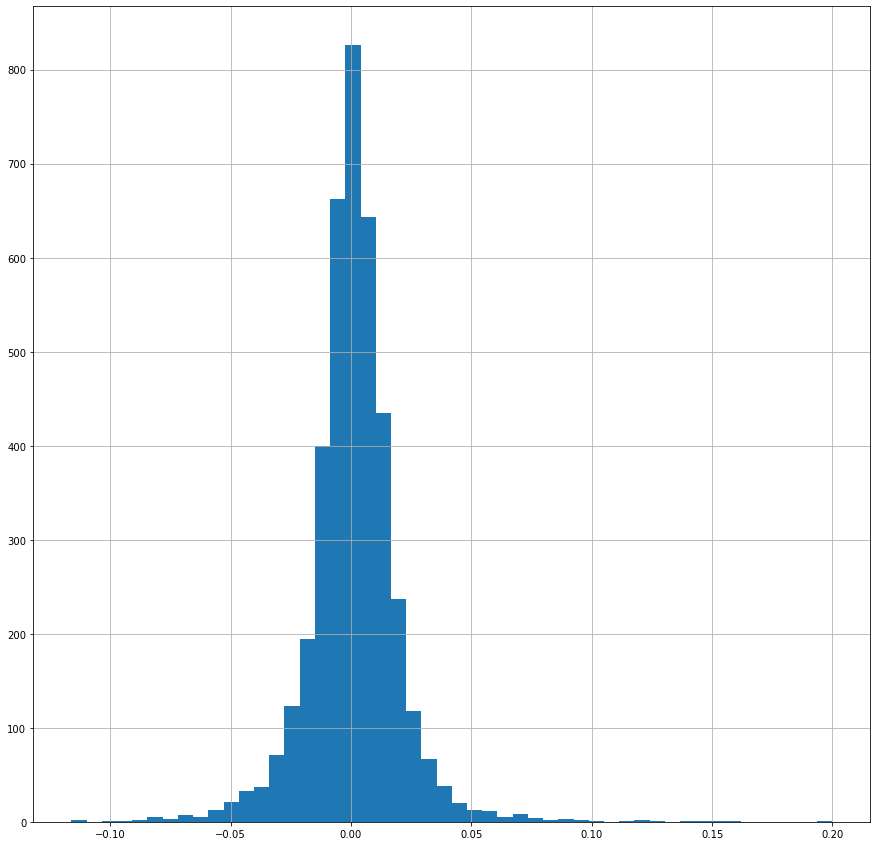

In [10]:
stock_df['pct_change'].hist(figsize=(15,15), bins =50)

In [11]:
stock_df['pct_change'].describe()['min'], stock_df['pct_change'].describe()['max']

(-0.11609130327535118, 0.19991550892913346)

In [12]:
interval_range = pd.interval_range(start=-.12, 
                                   freq=.005,
                                   end=.22)
len(interval_range)


67

In [13]:
stock_df['intervals'] = pd.cut(stock_df['pct_change'], bins=interval_range)

In [14]:
stock_df.head()

,open,high,low,close,volume,date,SYMBOL,prev_close,diff_1,pct_change,log_return,pct_return_0,pct_return_1,pct_return_2,pct_return_3,pct_return_4,pct_return_5,pct_return_6,pct_return_7,pct_return_8,pct_return_9,pct_return_10,pct_return_11,pct_return_12,pct_return_13,pct_return_14,pct_return_15,pct_return_16,pct_return_17,pct_return_18,pct_return_19,pct_return_20,pct_return_21,pct_return_22,pct_return_23,pct_return_24,pct_return_25,pct_return_26,pct_return_27,pct_return_28,pct_return_29,pct_return_30,intervals
0,1485.58,1512.3859,1485.25,1506.62,1437655,2020-08-12,GOOG,1480.32,26.30,0.017766,0.017610,0.017766,-0.010547,0.001077,-0.003740,0.017976,0.005898,-0.006430,-0.005739,-0.031663,0.006196,0.014450,-0.019514,0.012124,-0.002514,-0.033669,0.006462,-0.004662,0.033103,-0.001614,0.002880,-0.004564,0.006114,-0.019718,0.020351,0.010020,0.007285,-0.007033,0.021165,0.018539,0.017282,0.013362,"(0.015000000000000041, 0.020000000000000018]"
1,1492.44,1510.0000,1478.00,1480.32,1454365,2020-08-11,GOOG,1496.10,-15.78,-0.010547,-0.010603,-0.010547,0.001077,-0.003740,0.017976,0.005898,-0.006430,-0.005739,-0.031663,0.006196,0.014450,-0.019514,0.012124,-0.002514,-0.033669,0.006462,-0.004662,0.033103,-0.001614,0.002880,-0.004564,0.006114,-0.019718,0.020351,0.010020,0.007285,-0.007033,0.021165,0.018539,0.017282,0.013362,0.025789,"(-0.014999999999999972, -0.009999999999999981]"
2,1487.18,1504.0750,1473.08,1496.10,1289530,2020-08-10,GOOG,1494.49,1.61,0.001077,0.001077,0.001077,-0.003740,0.017976,0.005898,-0.006430,-0.005739,-0.031663,0.006196,0.014450,-0.019514,0.012124,-0.002514,-0.033669,0.006462,-0.004662,0.033103,-0.001614,0.002880,-0.004564,0.006114,-0.019718,0.020351,0.010020,0.007285,-0.007033,0.021165,0.018539,0.017282,0.013362,0.025789,-0.056496,"(2.7755575615628914e-17, 0.005000000000000032]"
3,1500.00,1516.8450,1481.64,1494.49,1577826,2020-08-07,GOOG,1500.10,-5.61,-0.003740,-0.003747,-0.003740,0.017976,0.005898,-0.006430,-0.005739,-0.031663,0.006196,0.014450,-0.019514,0.012124,-0.002514,-0.033669,0.006462,-0.004662,0.033103,-0.001614,0.002880,-0.004564,0.006114,-0.019718,0.020351,0.010020,0.007285,-0.007033,0.021165,0.018539,0.017282,0.013362,0.025789,-0.056496,0.006536,"(-0.004999999999999977, 2.7755575615628914e-17]"
4,1471.75,1502.3900,1466.00,1500.10,1995368,2020-08-06,GOOG,1473.61,26.49,0.017976,0.017817,0.017976,0.005898,-0.006430,-0.005739,-0.031663,0.006196,0.014450,-0.019514,0.012124,-0.002514,-0.033669,0.006462,-0.004662,0.033103,-0.001614,0.002880,-0.004564,0.006114,-0.019718,0.020351,0.010020,0.007285,-0.007033,0.021165,0.018539,0.017282,0.013362,0.025789,-0.056496,0.006536,-0.022152,"(0.015000000000000041, 0.020000000000000018]"


In [58]:
from IPython.display import clear_output
import time

def distribution_mapper(row, interval_range, size, col_names):
    '''
    Apply to a dataframe. For each row, get the last -size- rows.
    Mask on the intervals column to get the number of matches to the current -interval-.
    '''
    
    distribution_series = pd.Series(np.zeros(len(col_names)), index=interval_range)

    ## use value_counts and static shape to more quickly accomplish this 
    start_point = row.name + 1
    end_point = start_point + size + 1
    print("{:.2f}%".format(row.name / stock_df.shape[0] *100))
    values_series = stock_df.iloc[start_point:end_point]['intervals'].value_counts()
    distribution_series.loc[values_series.index] = values_series
    
#     dist_list = []
#     for interval in interval_range:
#         val = temp_df[temp_df['intervals'] == interval].shape[0]
#         dist_list.append(val)
          
    ## To do: 
    ## Optimize by returning rows of all interval values 
    ## save a temporary df for accessing
    ## iterate internally over the intervals
    ## create and return a series
    clear_output()
    return distribution_series
          
monthly_cols = []
yearly_cols = []

for interval in interval_range:
    monthly_cols.append('monthly_'+str(interval))
    yearly_cols.append('yearly_'+str(interval))
yearly_cols

start = time.time()
stock_df[monthly_cols] = stock_df.apply(distribution_mapper, args=(interval_range, 30, monthly_cols), axis=1)

print(time.time() - start)
stock_df[yearly_cols] = stock_df.apply(distribution_mapper, args=(interval_range, 253, yearly_cols), axis=1)
print(time.time() - start)

stock_df.head()

284.4890968799591


,open,high,low,close,volume,date,SYMBOL,prev_close,diff_1,pct_change,log_return,pct_return_0,pct_return_1,pct_return_2,pct_return_3,pct_return_4,pct_return_5,pct_return_6,pct_return_7,pct_return_8,pct_return_9,pct_return_10,pct_return_11,pct_return_12,pct_return_13,pct_return_14,pct_return_15,pct_return_16,pct_return_17,pct_return_18,pct_return_19,pct_return_20,pct_return_21,pct_return_22,pct_return_23,pct_return_24,pct_return_25,pct_return_26,pct_return_27,pct_return_28,pct_return_29,pct_return_30,intervals,"monthly_(-0.12, -0.11499999999999999]","monthly_(-0.11499999999999999, -0.10999999999999999]","monthly_(-0.10999999999999999, -0.105]","monthly_(-0.105, -0.09999999999999999]","monthly_(-0.09999999999999999, -0.09499999999999999]","monthly_(-0.09499999999999999, -0.09]","monthly_(-0.09, -0.08499999999999999]","monthly_(-0.08499999999999999, -0.07999999999999999]","monthly_(-0.07999999999999999, -0.07499999999999998]","monthly_(-0.07499999999999998, -0.06999999999999998]","monthly_(-0.06999999999999998, -0.06499999999999999]","monthly_(-0.06499999999999999, -0.059999999999999984]","monthly_(-0.059999999999999984, -0.05499999999999998]","monthly_(-0.05499999999999998, -0.04999999999999999]","monthly_(-0.04999999999999999, -0.044999999999999984]","monthly_(-0.044999999999999984, -0.03999999999999998]","monthly_(-0.03999999999999998, -0.034999999999999976]","monthly_(-0.034999999999999976, -0.02999999999999997]","monthly_(-0.02999999999999997, -0.02499999999999998]","monthly_(-0.02499999999999998, -0.019999999999999976]","monthly_(-0.019999999999999976, -0.014999999999999972]","monthly_(-0.014999999999999972, -0.009999999999999981]","monthly_(-0.009999999999999981, -0.004999999999999977]","monthly_(-0.004999999999999977, 2.7755575615628914e-17]","monthly_(2.7755575615628914e-17, 0.005000000000000032]","monthly_(0.005000000000000032, 0.010000000000000037]","monthly_(0.010000000000000037, 0.015000000000000041]","monthly_(0.015000000000000041, 0.020000000000000018]","monthly_(0.020000000000000018, 0.025000000000000022]","monthly_(0.025000000000000022, 0.030000000000000027]","monthly_(0.030000000000000027, 0.03500000000000003]","monthly_(0.03500000000000003, 0.040000000000000036]","monthly_(0.040000000000000036, 0.04500000000000004]","monthly_(0.04500000000000004, 0.050000000000000044]","monthly_(0.050000000000000044, 0.05500000000000005]","monthly_(0.05500000000000005, 0.06000000000000005]","monthly_(0.06000000000000005, 0.06500000000000003]","monthly_(0.06500000000000003, 0.07000000000000003]","monthly_(0.07000000000000003, 0.07500000000000004]","monthly_(0.07500000000000004, 0.08000000000000004]","monthly_(0.08000000000000004, 0.08500000000000005]","monthly_(0.08500000000000005, 0.09000000000000005]","monthly_(0.09000000000000005, 0.09500000000000006]","monthly_(0.09500000000000006, 0.10000000000000003]","monthly_(0.10000000000000003, 0.10500000000000004]","monthly_(0.10500000000000004, 0.11000000000000004]","monthly_(0.11000000000000004, 0.11500000000000005]","monthly_(0.11500000000000005, 0.12000000000000005]","monthly_(0.12000000000000005, 0.12500000000000006]","monthly_(0.12500000000000006, 0.13000000000000006]","monthly_(0.13000000000000006, 0.13500000000000006]","monthly_(0.13500000000000006, 0.14000000000000007]","monthly_(0.14000000000000007, 0.14500000000000007]","monthly_(0.14500000000000007, 0.15000000000000008]","monthly_(0.15000000000000008, 0.15500000000000008]","monthly_(0.15500000000000008, 0.16000000000000003]","monthly_(0.16000000000000003, 0.16500000000000004]","monthly_(0.16500000000000004, 0.17000000000000004]","monthly_(0.17000000000000004, 0.17500000000000004]","monthly_(0.17500000000000004, 0.18000000000000005]","monthly_(0.18000000000000005, 0.18500000000000005]","monthly_(0.18500000000000005, 0.19000000000000006]","monthly_(0.19000000000000006, 0.19500000000000006]","monthly_(0.19500000000000006, 0.20000000000000007]","monthly_(0.20000000000000007, 0.20500000000000007]","monthly_(0.20500000000000007, 

#### iv) add extraneous stats

1) Simple Moving average 50 and 120
2) Pct difference from SMA 50 and 120  
3) price difference percent currently against the actual SMA 50 and 120

In [83]:
stock_df['pct_change_SMA_50'] = stock_df.loc[::-1, 'pct_change'].rolling(50).mean()[::-1]
stock_df['pct_change_SMA_120'] = stock_df.loc[::-1,'pct_change'].rolling(120).mean()[::-1]

In [84]:
stock_df['close_SMA_50'] = stock_df.loc[::-1, 'close'].rolling(50).mean()[::-1]
stock_df['close_SMA_120'] = stock_df.loc[::-1,'close'].rolling(120).mean()[::-1]

In [85]:
stock_df

,open,high,low,close,volume,date,SYMBOL,prev_close,diff_1,pct_change,log_return,pct_return_0,pct_return_1,pct_return_2,pct_return_3,pct_return_4,pct_return_5,pct_return_6,pct_return_7,pct_return_8,pct_return_9,pct_return_10,pct_return_11,pct_return_12,pct_return_13,pct_return_14,pct_return_15,pct_return_16,pct_return_17,pct_return_18,pct_return_19,pct_return_20,pct_return_21,pct_return_22,pct_return_23,pct_return_24,pct_return_25,pct_return_26,pct_return_27,pct_return_28,pct_return_29,pct_return_30,intervals,"monthly_(-0.12, -0.11499999999999999]","monthly_(-0.11499999999999999, -0.10999999999999999]","monthly_(-0.10999999999999999, -0.105]","monthly_(-0.105, -0.09999999999999999]","monthly_(-0.09999999999999999, -0.09499999999999999]","monthly_(-0.09499999999999999, -0.09]","monthly_(-0.09, -0.08499999999999999]","monthly_(-0.08499999999999999, -0.07999999999999999]","monthly_(-0.07999999999999999, -0.07499999999999998]","monthly_(-0.07499999999999998, -0.06999999999999998]","monthly_(-0.06999999999999998, -0.06499999999999999]","monthly_(-0.06499999999999999, -0.059999999999999984]","monthly_(-0.059999999999999984, -0.05499999999999998]","monthly_(-0.05499999999999998, -0.04999999999999999]","monthly_(-0.04999999999999999, -0.044999999999999984]","monthly_(-0.044999999999999984, -0.03999999999999998]","monthly_(-0.03999999999999998, -0.034999999999999976]","monthly_(-0.034999999999999976, -0.02999999999999997]","monthly_(-0.02999999999999997, -0.02499999999999998]","monthly_(-0.02499999999999998, -0.019999999999999976]","monthly_(-0.019999999999999976, -0.014999999999999972]","monthly_(-0.014999999999999972, -0.009999999999999981]","monthly_(-0.009999999999999981, -0.004999999999999977]","monthly_(-0.004999999999999977, 2.7755575615628914e-17]","monthly_(2.7755575615628914e-17, 0.005000000000000032]","monthly_(0.005000000000000032, 0.010000000000000037]","monthly_(0.010000000000000037, 0.015000000000000041]","monthly_(0.015000000000000041, 0.020000000000000018]","monthly_(0.020000000000000018, 0.025000000000000022]","monthly_(0.025000000000000022, 0.030000000000000027]","monthly_(0.030000000000000027, 0.03500000000000003]","monthly_(0.03500000000000003, 0.040000000000000036]","monthly_(0.040000000000000036, 0.04500000000000004]","monthly_(0.04500000000000004, 0.050000000000000044]","monthly_(0.050000000000000044, 0.05500000000000005]","monthly_(0.05500000000000005, 0.06000000000000005]","monthly_(0.06000000000000005, 0.06500000000000003]","monthly_(0.06500000000000003, 0.07000000000000003]","monthly_(0.07000000000000003, 0.07500000000000004]","monthly_(0.07500000000000004, 0.08000000000000004]","monthly_(0.08000000000000004, 0.08500000000000005]","monthly_(0.08500000000000005, 0.09000000000000005]","monthly_(0.09000000000000005, 0.09500000000000006]","monthly_(0.09500000000000006, 0.10000000000000003]","monthly_(0.10000000000000003, 0.10500000000000004]","monthly_(0.10500000000000004, 0.11000000000000004]","monthly_(0.11000000000000004, 0.11500000000000005]","monthly_(0.11500000000000005, 0.12000000000000005]","monthly_(0.12000000000000005, 0.12500000000000006]","monthly_(0.12500000000000006, 0.13000000000000006]","monthly_(0.13000000000000006, 0.13500000000000006]","monthly_(0.13500000000000006, 0.14000000000000007]","monthly_(0.14000000000000007, 0.14500000000000007]","monthly_(0.14500000000000007, 0.15000000000000008]","monthly_(0.15000000000000008, 0.15500000000000008]","monthly_(0.15500000000000008, 0.16000000000000003]","monthly_(0.16000000000000003, 0.16500000000000004]","monthly_(0.16500000000000004, 0.17000000000000004]","monthly_(0.17000000000000004, 0.17500000000000004]","monthly_(0.17500000000000004, 0.18000000000000005]","monthly_(0.18000000000000005, 0.18500000000000005]","monthly_(0.18500000000000005, 0.19000000000000006]","monthly_(0.19000000000000006, 0.19500000000000006]","monthly_(0.19500000000000006, 0.20000000000000007]","monthly_(0.20000000000000007, 0.20500000000000007]","monthly_(0.20500000000000007, 

In [87]:
stock_df['diff_from_SMA_50'] = (stock_df['close'] - stock_df['close_SMA_50']) / stock_df['close_SMA_50']

In [88]:
stock_df['diff_from_SMA_120'] = (stock_df['close'] - stock_df['close_SMA_120']) / stock_df['close_SMA_120']

In [89]:
stock_df.head()

,open,high,low,close,volume,date,SYMBOL,prev_close,diff_1,pct_change,log_return,pct_return_0,pct_return_1,pct_return_2,pct_return_3,pct_return_4,pct_return_5,pct_return_6,pct_return_7,pct_return_8,pct_return_9,pct_return_10,pct_return_11,pct_return_12,pct_return_13,pct_return_14,pct_return_15,pct_return_16,pct_return_17,pct_return_18,pct_return_19,pct_return_20,pct_return_21,pct_return_22,pct_return_23,pct_return_24,pct_return_25,pct_return_26,pct_return_27,pct_return_28,pct_return_29,pct_return_30,intervals,"monthly_(-0.12, -0.11499999999999999]","monthly_(-0.11499999999999999, -0.10999999999999999]","monthly_(-0.10999999999999999, -0.105]","monthly_(-0.105, -0.09999999999999999]","monthly_(-0.09999999999999999, -0.09499999999999999]","monthly_(-0.09499999999999999, -0.09]","monthly_(-0.09, -0.08499999999999999]","monthly_(-0.08499999999999999, -0.07999999999999999]","monthly_(-0.07999999999999999, -0.07499999999999998]","monthly_(-0.07499999999999998, -0.06999999999999998]","monthly_(-0.06999999999999998, -0.06499999999999999]","monthly_(-0.06499999999999999, -0.059999999999999984]","monthly_(-0.059999999999999984, -0.05499999999999998]","monthly_(-0.05499999999999998, -0.04999999999999999]","monthly_(-0.04999999999999999, -0.044999999999999984]","monthly_(-0.044999999999999984, -0.03999999999999998]","monthly_(-0.03999999999999998, -0.034999999999999976]","monthly_(-0.034999999999999976, -0.02999999999999997]","monthly_(-0.02999999999999997, -0.02499999999999998]","monthly_(-0.02499999999999998, -0.019999999999999976]","monthly_(-0.019999999999999976, -0.014999999999999972]","monthly_(-0.014999999999999972, -0.009999999999999981]","monthly_(-0.009999999999999981, -0.004999999999999977]","monthly_(-0.004999999999999977, 2.7755575615628914e-17]","monthly_(2.7755575615628914e-17, 0.005000000000000032]","monthly_(0.005000000000000032, 0.010000000000000037]","monthly_(0.010000000000000037, 0.015000000000000041]","monthly_(0.015000000000000041, 0.020000000000000018]","monthly_(0.020000000000000018, 0.025000000000000022]","monthly_(0.025000000000000022, 0.030000000000000027]","monthly_(0.030000000000000027, 0.03500000000000003]","monthly_(0.03500000000000003, 0.040000000000000036]","monthly_(0.040000000000000036, 0.04500000000000004]","monthly_(0.04500000000000004, 0.050000000000000044]","monthly_(0.050000000000000044, 0.05500000000000005]","monthly_(0.05500000000000005, 0.06000000000000005]","monthly_(0.06000000000000005, 0.06500000000000003]","monthly_(0.06500000000000003, 0.07000000000000003]","monthly_(0.07000000000000003, 0.07500000000000004]","monthly_(0.07500000000000004, 0.08000000000000004]","monthly_(0.08000000000000004, 0.08500000000000005]","monthly_(0.08500000000000005, 0.09000000000000005]","monthly_(0.09000000000000005, 0.09500000000000006]","monthly_(0.09500000000000006, 0.10000000000000003]","monthly_(0.10000000000000003, 0.10500000000000004]","monthly_(0.10500000000000004, 0.11000000000000004]","monthly_(0.11000000000000004, 0.11500000000000005]","monthly_(0.11500000000000005, 0.12000000000000005]","monthly_(0.12000000000000005, 0.12500000000000006]","monthly_(0.12500000000000006, 0.13000000000000006]","monthly_(0.13000000000000006, 0.13500000000000006]","monthly_(0.13500000000000006, 0.14000000000000007]","monthly_(0.14000000000000007, 0.14500000000000007]","monthly_(0.14500000000000007, 0.15000000000000008]","monthly_(0.15000000000000008, 0.15500000000000008]","monthly_(0.15500000000000008, 0.16000000000000003]","monthly_(0.16000000000000003, 0.16500000000000004]","monthly_(0.16500000000000004, 0.17000000000000004]","monthly_(0.17000000000000004, 0.17500000000000004]","monthly_(0.17500000000000004, 0.18000000000000005]","monthly_(0.18000000000000005, 0.18500000000000005]","monthly_(0.18500000000000005, 0.19000000000000006]","monthly_(0.19000000000000006, 0.19500000000000006]","monthly_(0.19500000000000006, 0.20000000000000007]","monthly_(0.20000000000000007, 0.20500000000000007]","monthly_(0.20500000000000007, 

In [90]:
stock_df.to_pickle('./data/GOOG081320.pickle')